In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

In [31]:
numCells = 25
grid = np.zeros(numCells)
grid[13:16] = 1.0
referenceMass = np.sum(grid)
# for periodic domain meaning right curls around to left, faces can be same len as grid
# faces will represent right of cell meaning last face is shared between last and first grid cell
faces = np.zeros(numCells)
# wind velocity on the right face of each cell, meaning last wind speed is speed between last cell to first cell
i = np.arange(numCells)
U0 = 1.0
windSpeed = U0 * (1.0 + 0.5 * np.sin(2*np.pi*i/numCells))
cellWidth = 1
domainLength = numCells * cellWidth
target_CFL = 0.5
timeStep = target_CFL * cellWidth / np.max(np.abs(windSpeed))
courantNumber = abs(windSpeed) * timeStep / cellWidth

print(windSpeed)


[1.         1.12434494 1.24087684 1.34227355 1.42216396 1.47552826
 1.49901336 1.49114363 1.45241353 1.38525662 1.29389263 1.18406228
 1.06266662 0.93733338 0.81593772 0.70610737 0.61474338 0.54758647
 0.50885637 0.50098664 0.52447174 0.57783604 0.65772645 0.75912316
 0.87565506]


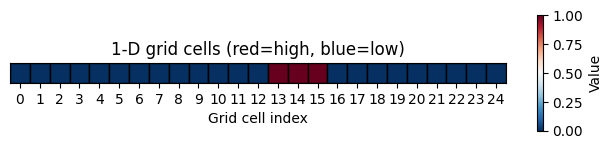

In [32]:
def plotGrid(grid):
    cmap = plt.colormaps['RdBu_r']             # red-blue color map
    norm = Normalize(vmin=0, vmax=1)

    fig, ax = plt.subplots(figsize=(8, 1.5))
    for i, val in enumerate(grid):
        color = cmap(norm(val))
        rect = plt.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)

    ax.set_xlim(0, len(grid))
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(len(grid)) + 0.5)
    ax.set_xticklabels(range(len(grid)))
    ax.set_yticks([])
    ax.set_xlabel('Grid cell index')
    ax.set_title('1-D grid cells (red=high, blue=low)')

    # add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, orientation='vertical', label='Value')

    plt.show()

plotGrid(grid)

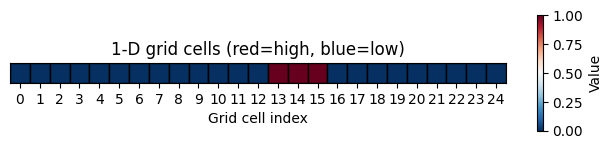

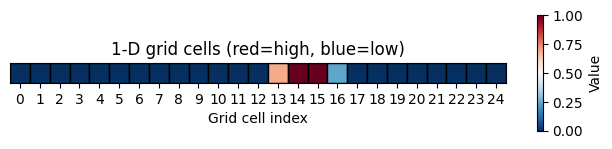

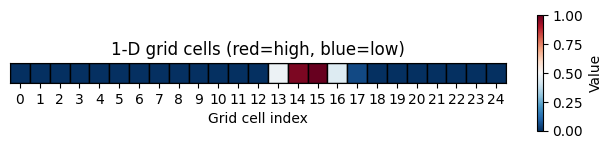

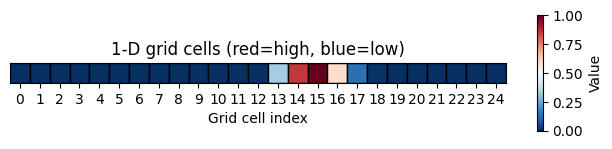

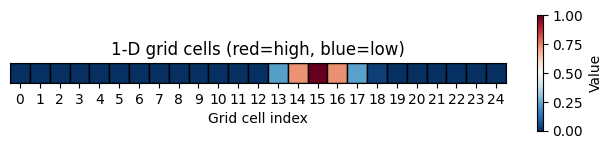

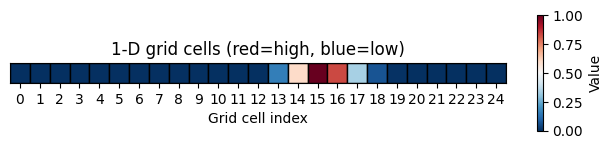

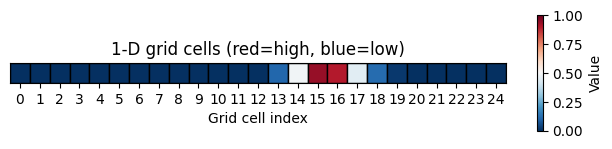

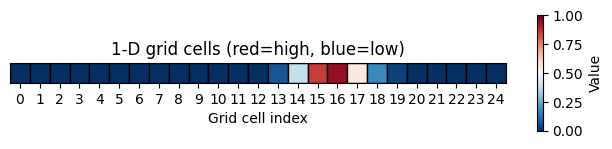

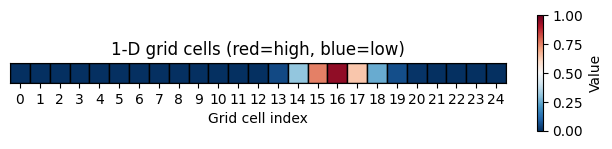

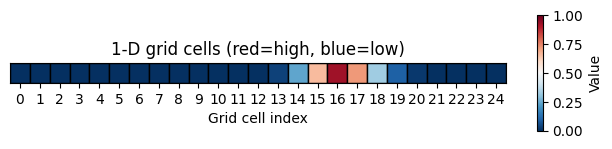

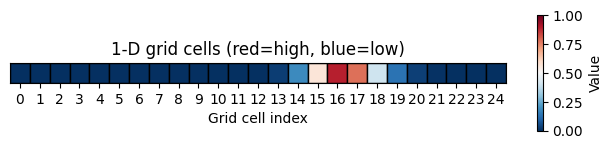

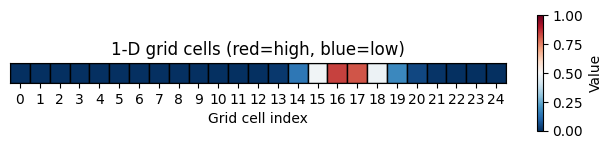

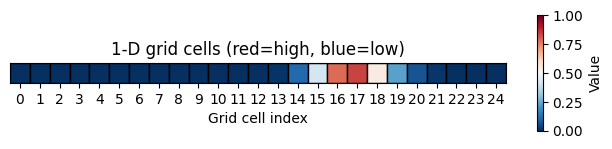

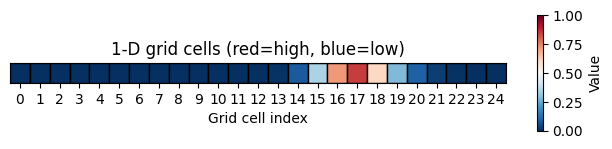

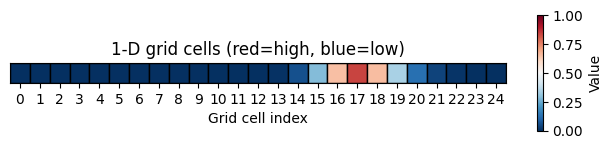

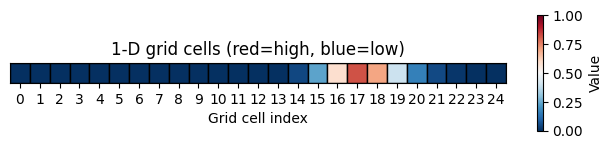

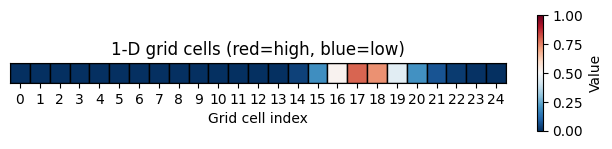

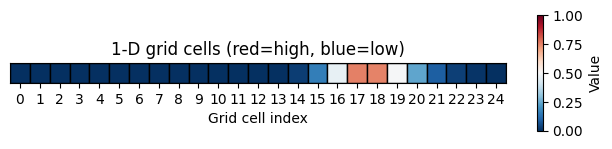

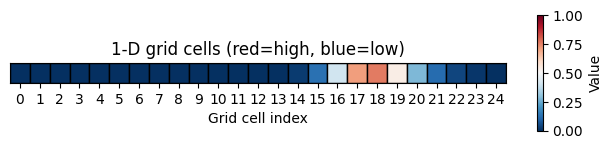

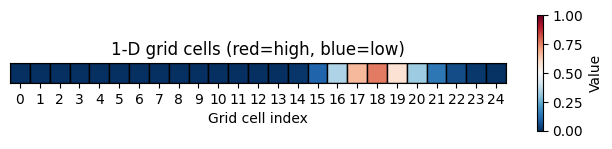

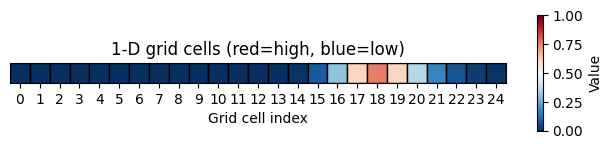

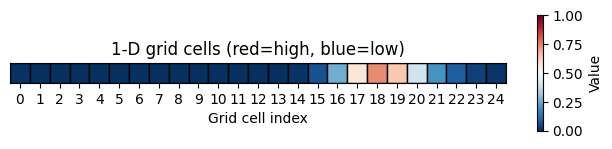

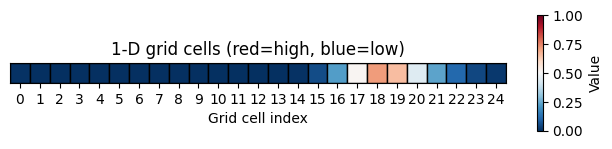

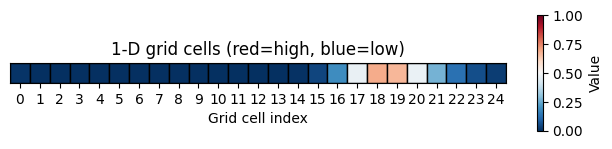

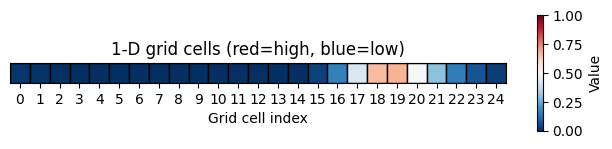

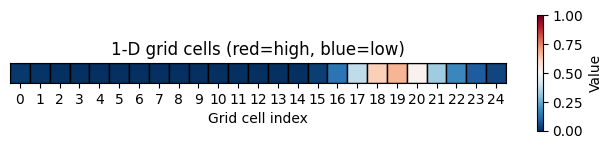

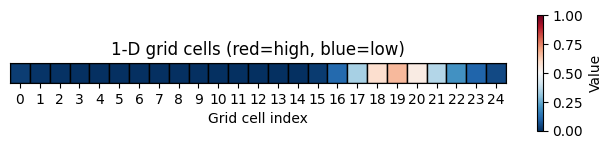

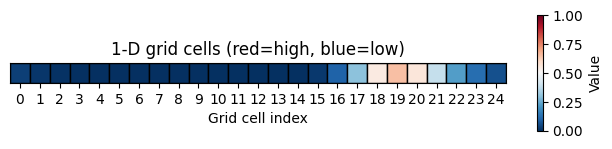

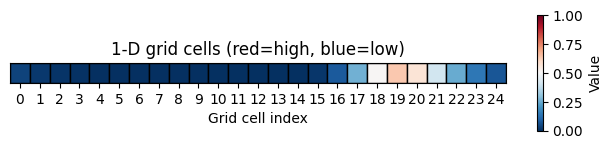

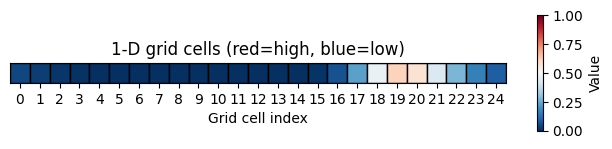

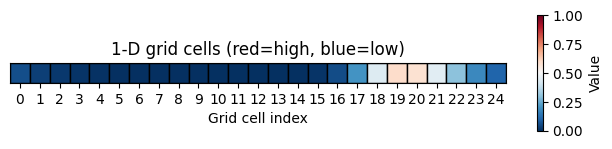

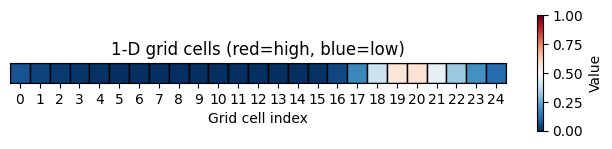

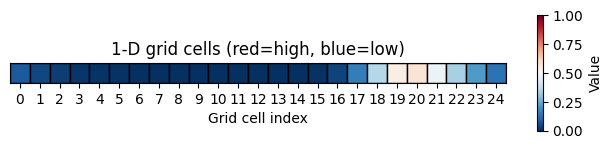

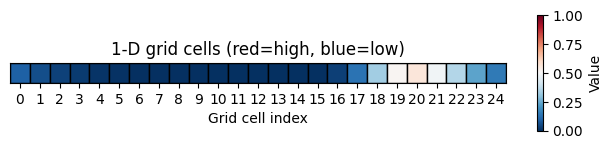

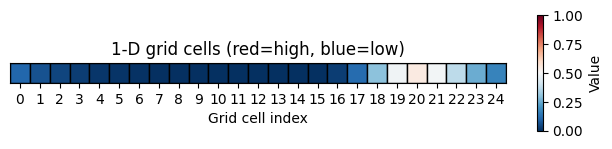

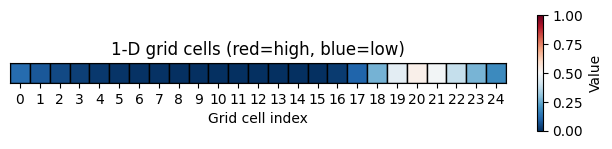

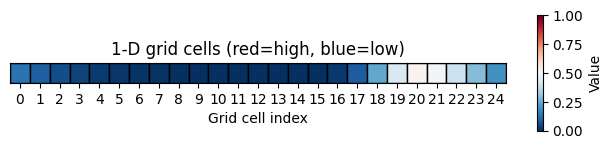

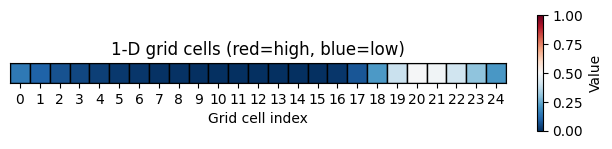

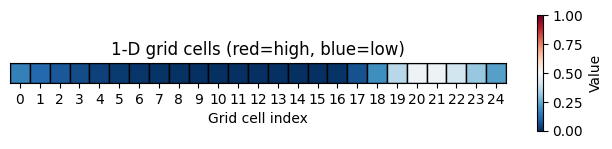

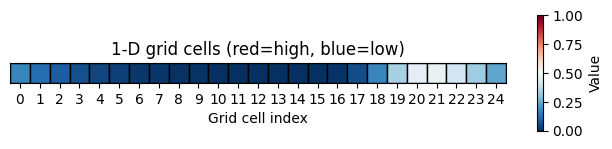

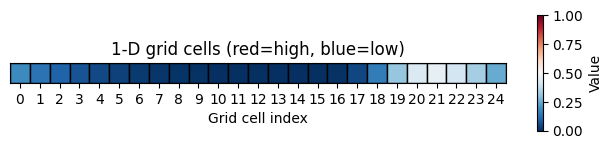

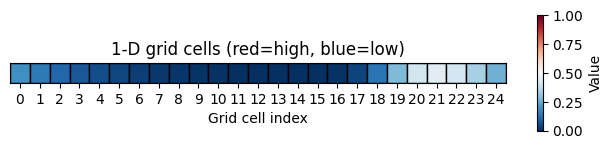

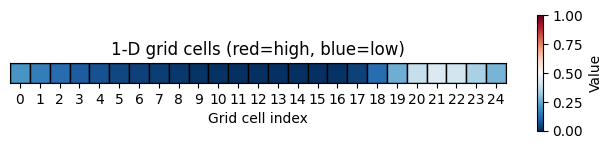

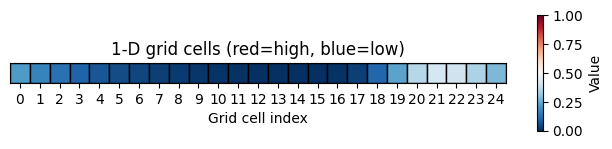

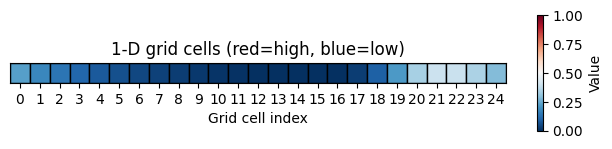

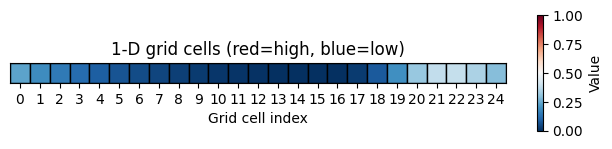

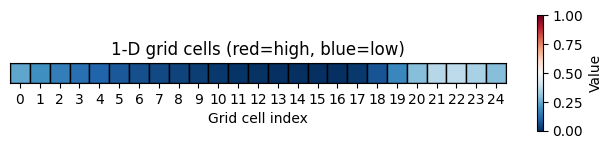

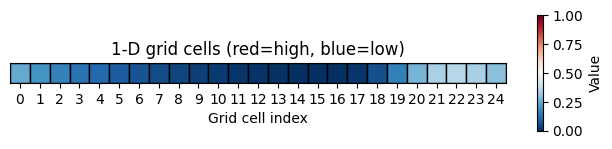

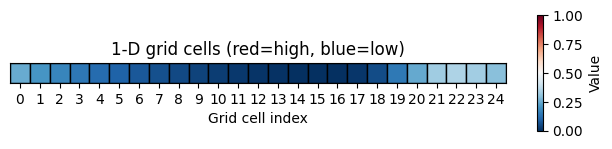

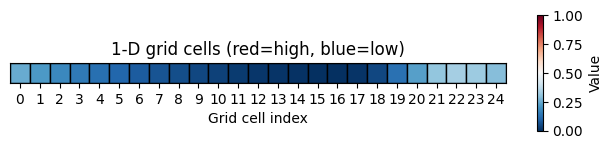

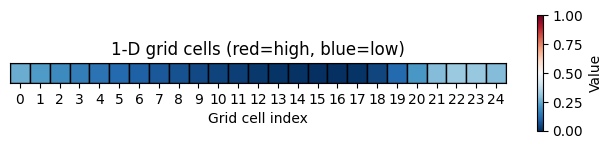

In [33]:
plotGrid(grid)
for i in range(50):
    # for wind speed from left to right, simply calculate how much of value moves
    # for wind speed from right to left (negative), get right grid cell's value first then multiply by wind speed
    # for instances where wind speed is negative, set it to 0 so that it will only apply the method to calculate negative wind speed and vice versa
    windSpeedPositive = np.maximum(windSpeed, 0)
    windSpeedNegative = np.minimum(windSpeed, 0)
    faces = windSpeedPositive * grid + windSpeedNegative * np.roll(grid, -1)

    # fluxDiff = faces[i] - faces[i-1] because np.roll(faces, 1) brings the left face and subtracts it from faces[i]
    fluxDiff = faces - np.roll(faces, 1)

    grid = grid - timeStep/cellWidth * fluxDiff

    assert np.isclose(np.sum(grid), referenceMass, rtol=1e-12, atol=1e-12), "Mass not conserved"
    assert np.all(courantNumber <= 1.0), 'CFL Condition'
    assert np.all(grid >= -1e-12), "Went negative"


    plotGrid(grid)